In [13]:
require(spdep)
require(rgdal)
require(spgwr)

Loading required package: spgwr
NOTE: This package does not constitute approval of GWR
as a method of spatial analysis; see example(gwr)


In [3]:
mpb10km_fishnet <- readOGR(dsn="/Users/dongmeichen/Documents/beetle/shp", layer="mpb10km_fishnet")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km_fishnet"
with 36965 features
It has 5 fields
Integer64 fields read as strings:  OID_ 


In [44]:
mpb10km_fishnet <- readOGR(dsn="/Users/dongmeichen/Documents/beetle/shp", layer="mpb10km_fishnet_selected")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km_fishnet_selected"
with 7636 features
It has 5 fields
Integer64 fields read as strings:  OID_ 


In [77]:
proj4string(mpb10km_fishnet)

[1] "+proj=laea +lat_0=45 +lon_0=-112.5 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0"

In [45]:
mpb10km_fishnet.nb <- poly2nb(mpb10km_fishnet)

In [46]:
mpb10km_fishnet.nb

Neighbour list object:
Number of regions: 7636 
Number of nonzero links: 46450 
Percentage nonzero weights: 0.07966249 
Average number of links: 6.083028 
83 regions with no links:
59 138 232 242 311 362 373 403 496 609 630 731 751 915 926 927 1002 1104 1108 1282 1353 1471 1476 1480 1503 1531 1629 1680 1693 1723 1737 2075 2309 2363 2410 2588 2832 2869 2885 3154 3278 3293 3500 3599 3695 4240 4413 4432 4590 4688 4732 4865 4895 4934 4946 5130 5193 5360 5439 5475 5479 5584 5615 5779 5919 5956 5960 6030 6092 6111 6436 6538 6556 6570 6613 6803 6804 6960 7018 7347 7485 7556 7611

In [47]:
GALfile <- "/Users/dongmeichen/Documents/beetle/data/mpb10km_fishnet_selected.gal"
write.nb.gal(mpb10km_fishnet.nb, GALfile)

In [48]:
mpb10km.gal.nb <- read.gal('/Users/dongmeichen/Documents/beetle/data/mpb10km_fishnet_selected.gal')

In [54]:
mpb10km.gal.w <- nb2listw(mpb10km.gal.nb, style="C", zero.policy=TRUE)

In [12]:
ROOT <- '/Users/dongmeichen/Documents/beetle/data'
data <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_scaled.csv', ROOT))
xy <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_xy.csv', ROOT))

In [38]:
spdf <- SpatialPointsDataFrame(data=data[,c('density', 'Tmean')], coords=cbind(xy$x,xy$y)) 

In [42]:
proj4string(spdf) <- CRS(proj4string(mpb10km_fishnet))

In [43]:
writeOGR(spdf, dsn="/Users/dongmeichen/Documents/beetle/shp", layer="mpb10km_MPB_affected", 
         driver="ESRI Shapefile", overwrite_layer=TRUE)

In [78]:
path <- "/Users/dongmeichen/Documents/beetle/shp"
x <- readOGR(dsn=path, layer="mpb10km_data_gwr")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km_data_gwr"
with 7636 features
It has 71 fields


In [79]:
gw_cov <- gw.cov(x, vars=c("density", "Tvar"), adapt=0.2, cor=TRUE, var.term=TRUE, longlat=FALSE)

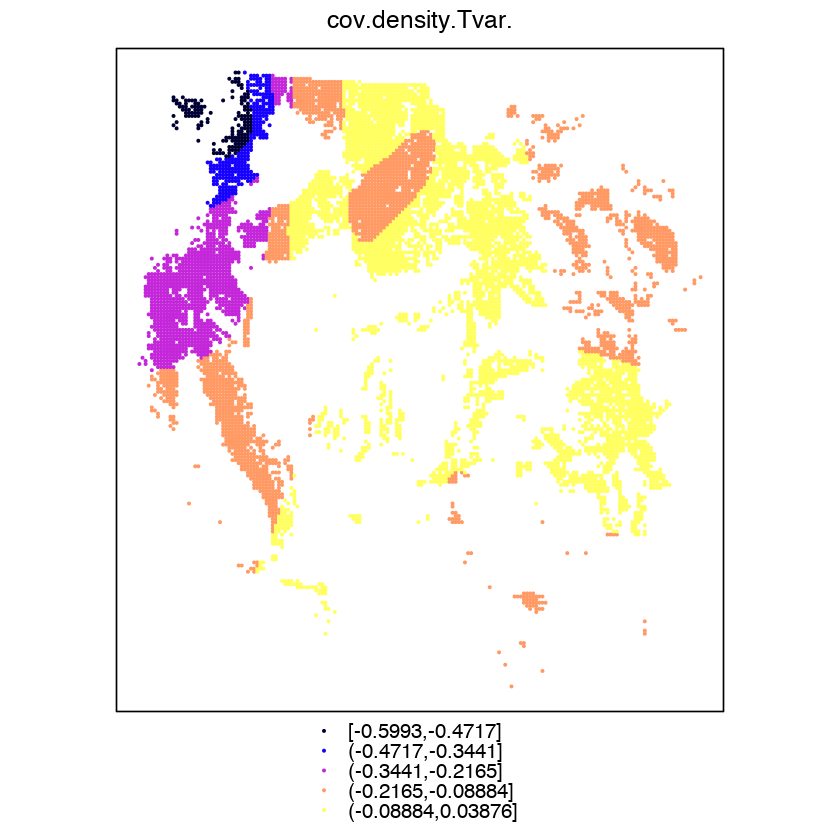

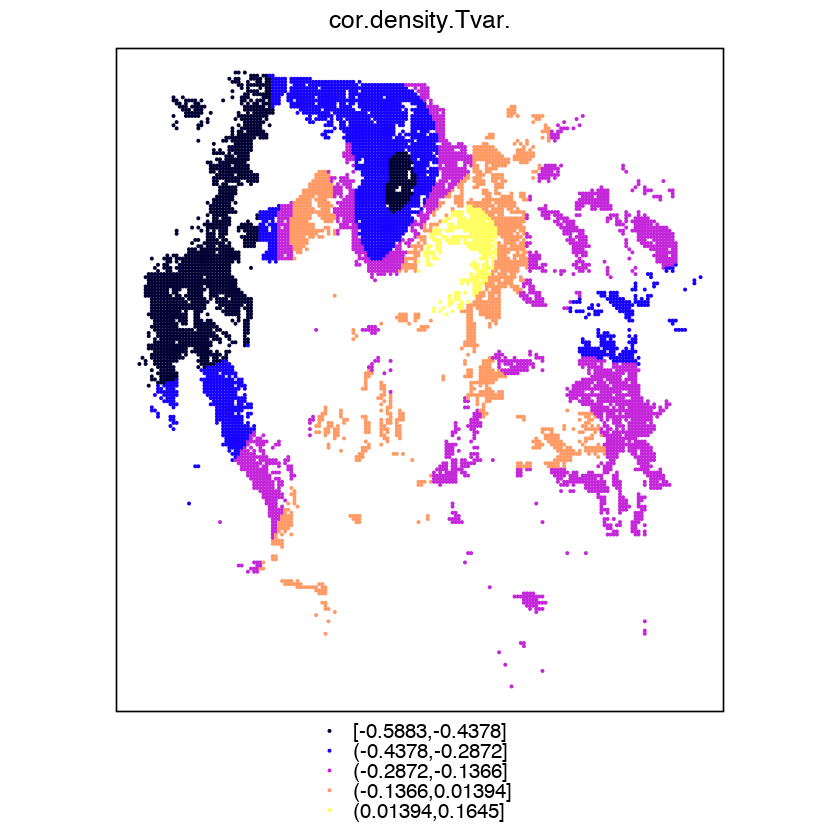

In [82]:
cov <- grep("cov", names(gw_cov$SDF),value=TRUE)
cor <- grep("cor", names(gw_cov$SDF),value=TRUE)
spplot(gw_cov$SDF, cov, main=cov, cex=0.3)
spplot(gw_cov$SDF, cor, main=cor, cex=0.3)

In [ ]:
ptm <- proc.time()
GWRbandwidth <- gwr.sel(beetleAcres ~ density + Tvar, data=data, coords=cbind(xy$x,xy$y), adapt=T)
proc.time() - ptm

In [ ]:
ptm <- proc.time()
gwr.model <- gwr(beetleAcres ~ density + Tvar, data=data, coords=cbind(xy$x, xy$y), 
    adapt=GWRbandwidth, hatmatrix=TRUE, se.fit=TRUE)
proc.time() - ptm

In [16]:
ptm <- proc.time()
GWRbandwidth <- gwr.sel(beetleAcres ~ density + Tmean, data=data, coords=cbind(xy$x,xy$y), adapt=T)
proc.time() - ptm

Adaptive q: 0.381966 CV score: 126.2978 
Adaptive q: 0.618034 CV score: 129.0536 
Adaptive q: 0.236068 CV score: 122.6412 
Adaptive q: 0.145898 CV score: 116.7548 
Adaptive q: 0.09016994 CV score: 109.0182 
Adaptive q: 0.05572809 CV score: 99.50077 
Adaptive q: 0.03444185 CV score: 89.97764 
Adaptive q: 0.02128624 CV score: 81.02683 
Adaptive q: 0.01315562 CV score: 73.16614 
Adaptive q: 0.008130619 CV score: 66.8608 
Adaptive q: 0.005024999 CV score: 61.62293 
Adaptive q: 0.00310562 CV score: 57.61485 
Adaptive q: 0.001919379 CV score: 54.41824 
Adaptive q: 0.001186241 CV score: 52.9948 
Adaptive q: 0.0007331374 CV score: 51.71693 
Adaptive q: 0.0004531039 CV score: 54.0599 
Adaptive q: 0.0008672769 CV score: 51.72428 
Adaptive q: 0.0006924473 CV score: 51.80802 
Adaptive q: 0.0007738276 CV score: 51.71527 
Adaptive q: 0.0008145177 CV score: 51.69085 
Adaptive q: 0.0008145177 CV score: 51.69085 


   user  system elapsed 
685.490  29.556 757.818 

In [21]:
# lon + lat + etopo1 + mStdAge + density + prs + GAP1 + vpd + Tmean + summerP2
ptm <- proc.time()
gwr.model <- gwr(beetleAcres ~ density + Tmean, data=data, coords=cbind(xy$x, xy$y), 
    adapt=GWRbandwidth, hatmatrix=TRUE, se.fit=TRUE)
proc.time() - ptm

     user    system   elapsed 
 7074.237  4006.805 11659.517 

In [23]:
system("say 'I am done'")

In [24]:
gwr.model

Call:
gwr(formula = beetleAcres ~ density + Tmean, data = data, coords = cbind(xy$x, 
    xy$y), adapt = GWRbandwidth, hatmatrix = TRUE, se.fit = TRUE)
Kernel function: gwr.Gauss 
Adaptive quantile: 0.0008145177 (about 6 of 7636 data points)
Summary of GWR coefficient estimates at data points:
                   Min.    1st Qu.     Median    3rd Qu.       Max.  Global
X.Intercept.  0.8874738  1.1960319  1.2838067  1.3623585  1.8405988  1.2555
density      -0.3815142  0.0044761  0.0282664  0.0541381  0.2450105  0.0196
Tmean        -0.6231059 -0.1237781 -0.0593898 -0.0122727  0.3969445 -0.0541
Number of data points: 7636 
Effective number of parameters (residual: 2traceS - traceS'S): 2079.143 
Effective degrees of freedom (residual: 2traceS - traceS'S): 5556.857 
Sigma (residual: 2traceS - traceS'S): 0.07673953 
Effective number of parameters (model: traceS): 1500.368 
Effective degrees of freedom (model: traceS): 6135.632 
Sigma (model: traceS): 0.07303047 
Sigma (ML): 0.06546374 
AICc 

In [25]:
results <- as.data.frame(gwr.model$SDF)
write.csv(results, sprintf('%s/gwr_results_test.csv', ROOT), row.names=FALSE)

In [50]:
sink(sprintf('%s/gwr_morantest.txt', ROOT))
gwr.morantest(gwr.model, mpb10km.gal.w, zero.policy = TRUE)
sink()


	Leung et al. 2000 three moment approximation for Moran's I

data:  GWR residuals
statistic = 16112, df = 15842, p-value = 0.06515
sample estimates:
           I 
-0.005551427 


In [51]:
system("say 'I am done'")

In [52]:
ptm <- proc.time()
GWRbandwidth <- gwr.sel(beetleAcres ~ lon + lat + etopo1 + mStdAge + density + 
    prs + GAP1 + GAP3 + vpd + wd + summerP0 + Tmean + ddAugJul + Tvar + winterMin + Acs, 
                        data=data, coords=cbind(xy$x,xy$y), adapt=T)
proc.time() - ptm

Adaptive q: 0.381966 CV score: 95.79534 
Adaptive q: 0.618034 CV score: 100.117 
Adaptive q: 0.236068 CV score: 90.3601 
Adaptive q: 0.145898 CV score: 84.11751 
Adaptive q: 0.09016994 CV score: 76.67634 
Adaptive q: 0.05572809 CV score: 68.92895 
Adaptive q: 0.03444185 CV score: 63.05649 
Adaptive q: 0.02128624 CV score: 57.97953 
Adaptive q: 0.01315562 CV score: 54.02259 
Adaptive q: 0.008130619 CV score: 51.00333 
Adaptive q: 0.005024999 CV score: 49.36785 
Adaptive q: 0.00310562 CV score: NA 


Warning message in optimize(gwr.cv.adapt.f, lower = beta1, upper = beta2, maximum = FALSE, :
“NA/Inf replaced by maximum positive value”

Adaptive q: 0.00621124 CV score: 49.75414 
Adaptive q: 0.004063177 CV score: NA 


Warning message in optimize(gwr.cv.adapt.f, lower = beta1, upper = beta2, maximum = FALSE, :
“NA/Inf replaced by maximum positive value”

Adaptive q: 0.005478103 CV score: 49.4997 
Adaptive q: 0.004657615 CV score: NA 


Warning message in optimize(gwr.cv.adapt.f, lower = beta1, upper = beta2, maximum = FALSE, :
“NA/Inf replaced by maximum positive value”

Adaptive q: 0.005198069 CV score: 49.40766 
Adaptive q: 0.004884671 CV score: 49.38461 
Adaptive q: 0.004984309 CV score: 49.36884 
Adaptive q: 0.005065689 CV score: 49.37782 
Adaptive q: 0.005024999 CV score: 49.36785 


    user   system  elapsed 
1471.122  466.122 2364.640 

In [53]:
system("say 'I am done'")

In [55]:
ptm <- proc.time()
gwr.model <- gwr(beetleAcres ~ lon + lat + etopo1 + mStdAge + density + 
    prs + GAP1 + GAP3 + vpd + wd + summerP0 + Tmean + ddAugJul + Tvar + winterMin + Acs, 
    data=data, coords=cbind(xy$x, xy$y), 
    adapt=GWRbandwidth, hatmatrix=TRUE, se.fit=TRUE)
proc.time() - ptm

     user    system   elapsed 
11252.283  3627.027 15803.806 

In [56]:
system("say 'I am done'")

In [57]:
gwr.model

Call:
gwr(formula = beetleAcres ~ lon + lat + etopo1 + mStdAge + density + 
    prs + GAP1 + GAP3 + vpd + wd + summerP0 + Tmean + ddAugJul + 
    Tvar + winterMin + Acs, data = data, coords = cbind(xy$x, 
    xy$y), adapt = GWRbandwidth, hatmatrix = TRUE, se.fit = TRUE)
Kernel function: gwr.Gauss 
Adaptive quantile: 0.005024999 (about 38 of 7636 data points)
Summary of GWR coefficient estimates at data points:
                    Min.     1st Qu.      Median     3rd Qu.        Max.
X.Intercept. -4.0315e+00  9.1308e-01  1.2455e+00  1.5525e+00  4.6543e+00
lon          -2.0487e+00 -2.1045e-01  4.2133e-02  3.2784e-01  2.0416e+00
lat          -9.7783e-01 -1.2200e-01  4.8562e-02  2.2864e-01  1.2995e+00
etopo1       -1.2028e-01  1.0188e-02  6.3509e-02  1.1450e-01  5.0182e-01
mStdAge      -8.5262e-02 -6.6536e-03  7.4993e-06  5.5978e-03  3.9253e-02
density      -4.0513e-02  1.1971e-02  2.3417e-02  3.8053e-02  1.0079e-01
prs          -3.9617e-02 -9.0450e-03 -3.3498e-03  2.0307e-03  4.4671e-02
GA

In [58]:
results <- as.data.frame(gwr.model$SDF)
write.csv(results, sprintf('%s/gwr_results_16.csv', ROOT), row.names=FALSE)

In [59]:
ptm <- proc.time()
gwr.morantest(gwr.model, mpb10km.gal.w, zero.policy = TRUE)
proc.time() - ptm

Warning message in gwr.morantest(gwr.model, mpb10km.gal.w, zero.policy = TRUE):
“mpb10km.gal.wnot row standardised”


	Leung et al. 2000 three moment approximation for Moran's I

data:  GWR residuals
statistic = 10126, df = 9730.6, p-value = 0.002555
sample estimates:
          I 
0.005569023 


    user   system  elapsed 
1995.300   13.312 2052.217 

In [60]:
system("say 'I am done'")

In [61]:
ptm <- proc.time()
GWRbandwidth <- gwr.sel(beetleAcres ~  etopo1 + mStdAge + density + 
    prs + GAP1 + GAP3 + vpd + wd + summerP0 + Tmean + winterMin + Acs, 
    data=data, coords=cbind(xy$x,xy$y), adapt=T)
proc.time() - ptm

Adaptive q: 0.381966 CV score: 101.0585 
Adaptive q: 0.618034 CV score: 105.2991 
Adaptive q: 0.236068 CV score: 95.51503 
Adaptive q: 0.145898 CV score: 88.80132 
Adaptive q: 0.09016994 CV score: 81.30395 
Adaptive q: 0.05572809 CV score: 73.2046 
Adaptive q: 0.03444185 CV score: 66.76408 
Adaptive q: 0.02128624 CV score: 61.25872 
Adaptive q: 0.01315562 CV score: 56.96975 
Adaptive q: 0.008130619 CV score: 53.52357 
Adaptive q: 0.005024999 CV score: 51.45414 
Adaptive q: 0.00310562 CV score: NA 


Warning message in optimize(gwr.cv.adapt.f, lower = beta1, upper = beta2, maximum = FALSE, :
“NA/Inf replaced by maximum positive value”

Adaptive q: 0.00621124 CV score: 52.05271 
Adaptive q: 0.004291861 CV score: NA 


Warning message in optimize(gwr.cv.adapt.f, lower = beta1, upper = beta2, maximum = FALSE, :
“NA/Inf replaced by maximum positive value”

Adaptive q: 0.005478103 CV score: 51.63341 
Adaptive q: 0.004744965 CV score: 51.37629 
Adaptive q: 0.004571895 CV score: NA 


Warning message in optimize(gwr.cv.adapt.f, lower = beta1, upper = beta2, maximum = FALSE, :
“NA/Inf replaced by maximum positive value”

Adaptive q: 0.004851928 CV score: 51.40221 
Adaptive q: 0.004678858 CV score: NA 


Warning message in optimize(gwr.cv.adapt.f, lower = beta1, upper = beta2, maximum = FALSE, :
“NA/Inf replaced by maximum positive value”

Adaptive q: 0.004785822 CV score: 51.38254 
Adaptive q: 0.004744965 CV score: 51.37629 


    user   system  elapsed 
 989.429  268.568 1283.628 

In [62]:
ptm <- proc.time()
gwr.model <- gwr(beetleAcres ~ etopo1 + mStdAge + density + 
    prs + GAP1 + GAP3 + vpd + wd + summerP0 + Tmean + winterMin + Acs, 
    data=data, coords=cbind(xy$x, xy$y), 
    adapt=GWRbandwidth, hatmatrix=TRUE, se.fit=TRUE)
proc.time() - ptm

     user    system   elapsed 
 9006.723  2871.378 12120.167 

In [63]:
gwr.model

Call:
gwr(formula = beetleAcres ~ etopo1 + mStdAge + density + prs + 
    GAP1 + GAP3 + vpd + wd + summerP0 + Tmean + winterMin + Acs, 
    data = data, coords = cbind(xy$x, xy$y), adapt = GWRbandwidth, 
    hatmatrix = TRUE, se.fit = TRUE)
Kernel function: gwr.Gauss 
Adaptive quantile: 0.004744965 (about 36 of 7636 data points)
Summary of GWR coefficient estimates at data points:
                    Min.     1st Qu.      Median     3rd Qu.        Max.
X.Intercept. -2.62331990  1.12695549  1.28596738  1.45697621  3.91915117
etopo1       -0.17621133  0.01556767  0.06172625  0.11141435  0.31611517
mStdAge      -0.09881045 -0.00688580 -0.00013846  0.00598338  0.04303010
density      -0.04401199  0.01230829  0.02460671  0.03991716  0.10038937
prs          -0.04368870 -0.00959830 -0.00376961  0.00237503  0.05054430
GAP1         -0.15136641 -0.02089354 -0.00707424  0.00215865  0.04334964
GAP3         -0.04465070 -0.00377424  0.00422628  0.01244131  0.04888033
vpd          -0.42926550 -0.1064

In [64]:
results <- as.data.frame(gwr.model$SDF)
write.csv(results, sprintf('%s/gwr_results_12.csv', ROOT), row.names=FALSE)

In [65]:
ptm <- proc.time()
gwr.morantest(gwr.model, mpb10km.gal.w, zero.policy = TRUE)
proc.time() - ptm

Warning message in gwr.morantest(gwr.model, mpb10km.gal.w, zero.policy = TRUE):
“mpb10km.gal.wnot row standardised”


	Leung et al. 2000 three moment approximation for Moran's I

data:  GWR residuals
statistic = 11066, df = 10570, p-value = 0.0003814
sample estimates:
         I 
0.01088281 


    user   system  elapsed 
2052.138   15.655 2118.422 

In [66]:
system("say 'I am done'")

In [68]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
results <- read.csv(sprintf('%s/gwr_results_test.csv', DATA))
head(results)

sum.w,X.Intercept.,density,Tmean,X.Intercept._se,density_se,Tmean_se,gwr.e,pred,pred.se,localR2,X.Intercept._se_EDF,density_se_EDF,Tmean_se_EDF,pred.se.1,coord.x,coord.y
31.89422,1.288301,-0.09027023,-0.09966493,0.03193584,0.02688568,0.01620711,-0.008351820,0.9972567,0.02120447,0.5504005,0.03355779,0.02825114,0.01703023,0.02228139,-990000,-460000
20.71328,1.215957,-0.07707318,-0.06776255,0.04502517,0.03519231,0.02609196,-0.018996266,1.0079011,0.01890759,0.4546113,0.04731190,0.03697965,0.02741711,0.01986786,-980000,-440000
15.87047,1.176281,-0.04117957,-0.07185869,0.05385645,0.03981377,0.03007109,0.002088944,0.9868159,0.02867876,0.4148220,0.05659170,0.04183582,0.03159834,0.03013529,-970000,-460000
17.02162,1.174158,-0.05182526,-0.06162650,0.05368245,0.03923910,0.03155810,-0.005926880,0.9948317,0.03274591,0.4084286,0.05640886,0.04123196,0.03316087,0.03440900,-970000,-450000
13.84746,1.214716,0.03606308,-0.07426276,0.05416824,0.03603764,0.04136628,-0.099059002,1.1368525,0.01566635,0.3404500,0.05691932,0.03786791,0.04346719,0.01646201,-970000,-240000
12.47967,1.231086,0.07613710,-0.11279104,0.06189010,0.04697787,0.05234639,0.151946431,1.1846327,0.02687986,0.3602776,0.06503336,0.04936377,0.05500495,0.02824503,-970000,-230000


In [69]:
n <- dim(results)[1]
np <- length(which(names(results)=='density'):which(names(results)=='Tmean'))
ntests <- n * np

In [70]:
coeffs <- results[, c("density", "Tmean")]

In [71]:
xy <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_xy.csv', DATA))

In [72]:
enp <- 2079.143 
for(v in c("density", "Tmean")){
    results[,paste0(v, '_t')] <- results[,v] / results[,paste0(v, '_se')]
    t <- results[,paste0(v, '_t')]
    pvals <- round(2 * (1 - pt(abs(t), enp)), 3)
    results[,paste0(v, '_p')] <- pvals
    results[,paste0(v, '_p_by')] <- round(p.adjust(pvals, "BY", n = ntests))
    results[,paste0(v, '_p_bh')] <- round(p.adjust(pvals, "BH", n = ntests))
    results[,paste0(v, '_p_bo')] <- round(p.adjust(pvals, "bonferroni", n = ntests))
    asf_pvals <- round(pvals * (1 + enp - (enp/ntests)), 3)
    asf_pvals[asf_pvals > 1] <- 1
    results[,paste0(v, '_p_fb')] <- asf_pvals
}

In [73]:
library(rgdal)
library(lattice)

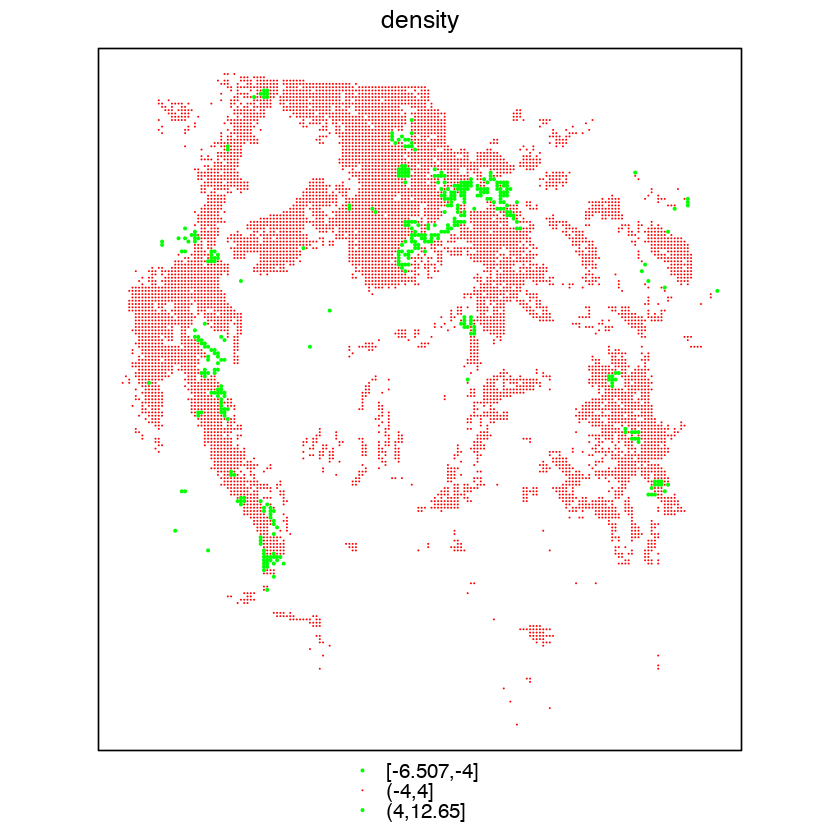

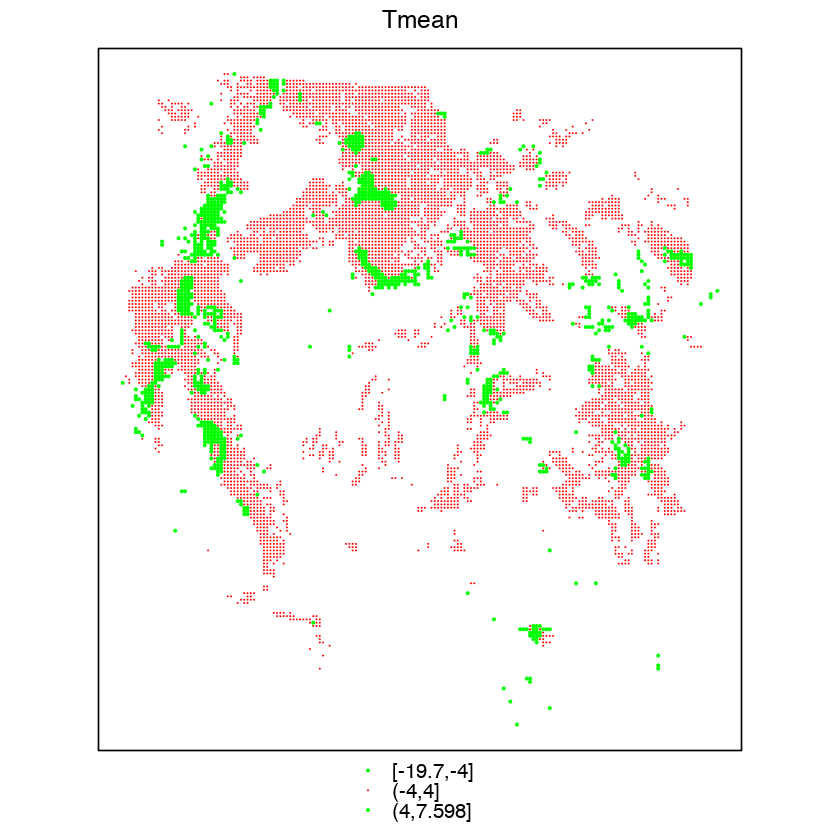

In [76]:
for(v in c("density", "Tmean")){
    t <- results[,paste0(v, '_t')]
    sig.map <- SpatialPointsDataFrame(data=data.frame(t), coords=cbind(xy$x,xy$y))
    colours <- c("green","red","green")
    breaks <- c(min(t),-4,4,max(t))
    print(spplot(sig.map, cuts=breaks, col.regions=colours, cex=c(0.3,0.1,0.3), main=v))
}